In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera




In [2]:
data_path = r'C:\Users\ferre\OneDrive\Área de Trabalho\quant\data\BTC_data.csv'

In [3]:

sns.set_theme(style="whitegrid", context="talk")

def plot_ts_sns(
    data,
    title="Time Series",
    ylabel="Value",
    xlabel="Date",
    rolling=None,
    logy=False,
    figsize=(12, 5)
):
    """
    data: pandas Series or DataFrame with DatetimeIndex
    rolling: int -> optional rolling mean
    logy: bool -> log y-axis
    """

    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError("data must be pandas Series or DataFrame")

    plt.figure(figsize=figsize)

    if isinstance(data, pd.Series):
        sns.lineplot(x=data.index, y=data.values, label=data.name)

        if rolling:
            sns.lineplot(
                x=data.index,
                y=data.rolling(rolling).mean(),
                linestyle="--",
                label=f"MA({rolling})"
            )

    else:
        for col in data.columns:
            sns.lineplot(x=data.index, y=data[col], label=col)

            if rolling:
                sns.lineplot(
                    x=data.index,
                    y=data[col].rolling(rolling).mean(),
                    linestyle="--",
                    label=f"{col} MA({rolling})"
                )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if logy:
        plt.yscale("log")

    plt.tight_layout()
    plt.show()


In [4]:
df = pd.read_csv(data_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df = df.set_index('timestamp')
df.head(5)

,open,high,low,close,volume
timestamp,,,,,
2017-10-28 00:00:00+00:00,5768.79,5850.02,5630.03,5719.64,1276.754412
2017-10-29 00:00:00+00:00,5709.98,6189.88,5648.01,6169.98,1804.778173
2017-10-30 00:00:00+00:00,6133.01,6248.68,6030.00,6120.50,1473.687043
2017-10-31 00:00:00+00:00,6120.52,6498.01,6100.00,6463.00,1511.774925
2017-11-01 00:00:00+00:00,6463.00,6774.67,6338.02,6753.98,1675.615188


In [6]:
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['return'] = df['close'].pct_change()

In [7]:
df['rv'] = (df.groupby(df.index.date)['log_return'].transform(lambda x: np.sum(x**2)))
df['log_rv'] = np.log(df['rv'])

df = df.replace([np.inf, -np.inf], np.nan).dropna()

c:\Users\ferre\OneDrive\Área de Trabalho\quant\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


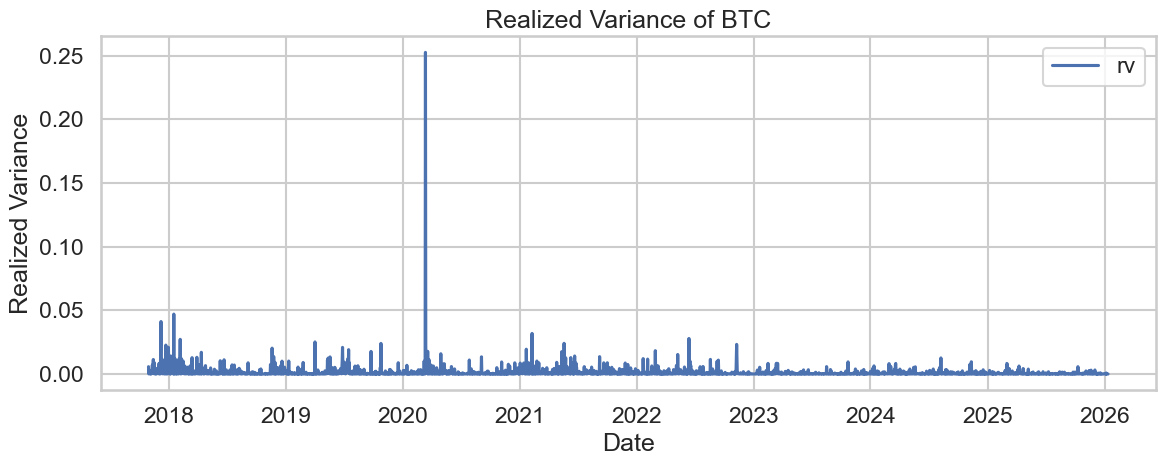

In [8]:
plot_ts_sns(
    df['rv'],
    title="Realized Variance of BTC",
    ylabel="Realized Variance",)


In [9]:
df['rv'].skew(), df['log_rv'].skew(), df['rv'].kurtosis(), df['log_rv'].kurtosis()

(33.79743075598664,
 -1.0240987562484856,
 1522.2668530353735,
 2.1709481049753303)

In [10]:
jarque_bera(df['rv']), jarque_bera(df['log_rv'])

(SignificanceResult(statistic=289074075.2029412, pvalue=0.0),
 SignificanceResult(statistic=1109.2054088019495, pvalue=1.3775451118598509e-241))